# Least Square Estimation Quantum State Tomography

In [2]:
import numpy as np
import qutip as qt
import cvxpy as cvx

In [3]:
#define Pauli matrices
X=qt.sigmax()
Y=qt.sigmay()
Z=qt.sigmaz()
I=qt.qeye(2)

In [4]:
#define POVMs
Xp=0.5*(I+X)
Xm =0.5*(I-X)

Yp=0.5*(I+Y)
Ym=0.5*(I-Y)

Zp=0.5*(I+Z)
Zm=0.5*(I-Z)

In [5]:
#List of measurements
m=[Xp,Yp,Zp,Xm,Ym,Zm]

In [9]:
Bell=qt.bell_state('11')*qt.bell_state('11').dag()
Bell

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 0.   0.   0.   0. ]
 [ 0.   0.5 -0.5  0. ]
 [ 0.  -0.5  0.5  0. ]
 [ 0.   0.   0.   0. ]]

(<Figure size 432x288 with 2 Axes>, <Axes3D:>)

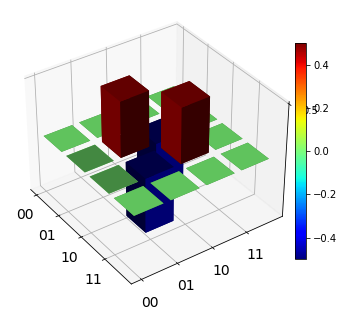

In [10]:
qt.matrix_histogram(Bell, ['00','01','10','11'],['00','01','10','11'] )

In [11]:
#Define the matrix of measurement operators
A=[]
#Define the vector of measurement data
b=[]

#fill A and b
for i in range(6):
    for j in range(6):
            M=qt.tensor(m[i],m[j])
            b.append((Bell*M).tr())
            M=M.full().flatten()
            A.append(M)

## The least squares fitting can be solved as a convex optimization problem
 \begin{equation} \underset{\vec{X}}{\operatorname{minimize}:} \quad||A\vec{X}-\vec{b}||_2 \end{equation}

In [13]:
#The vector X is the flattened density matrix rho
eps=0.01
rho = cvx.Variable((16,))
prob = cvx.Problem(cvx.Minimize(cvx.norm(rho@A-b,2)),[cvx.norm(rho-Bell.full().flatten())<=eps])

In [14]:
result = prob.solve()
rho_lsf=qt.Qobj(rho.value.reshape(4,4))
rho_lsf

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 6.41675728e-18  1.12208055e-18 -2.27278522e-19 -8.09479712e-18]
 [ 1.12186804e-18  5.00000000e-01 -5.00000000e-01 -1.40588969e-19]
 [-2.27278522e-19 -5.00000000e-01  5.00000000e-01  1.28519550e-18]
 [-8.19162905e-18 -1.40588969e-19  1.28530318e-18 -1.29354485e-17]]

(<Figure size 432x288 with 2 Axes>, <Axes3D:>)

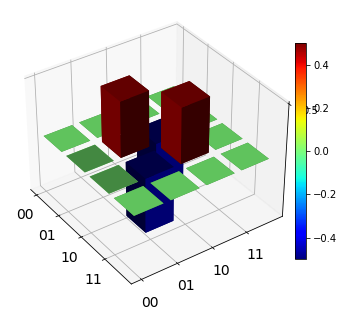

In [15]:
qt.matrix_histogram(rho_lsf, ['00','01','10','11'],['00','01','10','11'] )

# Linear Inversion Quantum State Tomography

## The minimum norm least squares solution $\vec{X}$ can be found in terms of the pseudo-inverse $A^+$ of $\mathbf{A}$
\begin{equation}
    \vec{X}=(A^\dagger A)^{-1} A^\dagger \vec{b} 
\end{equation}

In [16]:
#change the list into an array so we can be able to do operations like adjoint and inverse
A=np.asarray(A)

In [17]:
#calculate (A^\dagger A)^-1 A^\dagger
a=np.matmul(np.linalg.inv(np.matmul(A.conj().T,A)),A.conj().T)

In [18]:
rho_li=qt.Qobj(np.matmul(a,b).reshape(4,4,order='F'))
rho_li

Quantum object: dims = [[4], [4]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[-1.66533454e-16+0.00000000e+00j  0.00000000e+00-2.77555756e-17j
   6.93889390e-18-6.93889390e-18j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+2.77555756e-17j  5.00000000e-01+0.00000000e+00j
  -5.00000000e-01+0.00000000e+00j -6.93889390e-18-6.93889390e-18j]
 [ 6.93889390e-18+6.93889390e-18j -5.00000000e-01+0.00000000e+00j
   5.00000000e-01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j -6.93889390e-18+6.93889390e-18j
   0.00000000e+00+0.00000000e+00j  1.38777878e-17+0.00000000e+00j]]

(<Figure size 432x288 with 2 Axes>, <Axes3D:>)

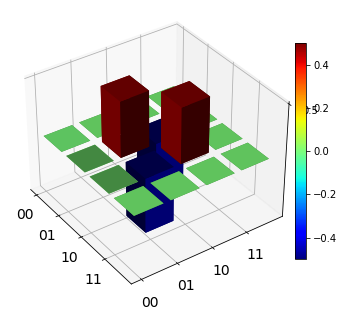

In [19]:
qt.matrix_histogram(rho_li, ['00','01','10','11'],['00','01','10','11'] )